# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# Import Dataset

In [2]:
df = pd.read_csv('/content/udemy_courses.csv')

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


# Data Clean

In [4]:
# check data type

print(df.dtypes)

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object


In [5]:
print(df['published_timestamp'].head())

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object


In [6]:
# check format in column

print(f"sum of null values after set new format= {pd.to_datetime(df['published_timestamp'], format= 'mixed').isna().sum()}")

sum of null values after set new format= 0


In [7]:
# change (published_timestamp) to datetime

df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], format= 'mixed')

# check change is done

print(f"data type : {df['published_timestamp'].dtypes}")

data type : datetime64[ns, UTC]


In [8]:
# check null values

print(df.isnull().sum())

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [9]:
# check duplicated values

print(f"sum of duplicated values= {df.duplicated().sum()}")

sum of duplicated values= 6


In [10]:
# drop duplicated values

df.drop_duplicates(inplace=True)

In [11]:
# check that the duplicated values have been dropped

print(f"sum of duplicated values= {df.duplicated().sum()}")

sum of duplicated values= 0


In [12]:
# check data validity for object columns
# print object columns that have unique values less than 15

for x in df.columns:
    if (df[x].nunique() <= 15) & (df[x].dtypes == 'object'):
        print(f"column: {x}")
        print(f"{df[x].unique()}\n")

column: level
['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']

column: subject
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']



In [13]:
# check data validity for numerical columns

num_df= df.select_dtypes(exclude= ['object', 'datetime64[ns]', 'bool']).drop(columns= 'course_id')
num_df.describe().round(2)

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3672.00,3672.00,3672.00,3672.00,3672.00
mean,66.10,3190.59,156.37,40.14,4.10
std,61.04,9488.11,936.18,50.42,6.06
min,0.00,0.00,0.00,0.00,0.00
25%,20.00,111.75,4.00,15.00,1.00
50%,45.00,912.00,18.00,25.00,2.00
75%,95.00,2548.75,67.00,46.00,4.50
max,200.00,268923.00,27445.00,779.00,78.50


In [14]:
# drop record with (num_lectures) & (content_duration) = 0

df = df[(df['content_duration'] != 0) | (df['num_lectures'] != 0)]

In [15]:
# check that the drop has been happened

num_df= df.select_dtypes(exclude= ['object', 'datetime64[ns]', 'bool']).drop(columns= 'course_id')
num_df.describe().round(2)

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3671.00,3671.00,3671.00,3671.00,3671.00
mean,66.12,3191.46,156.41,40.15,4.10
std,61.04,9489.25,936.30,50.42,6.06
min,0.00,0.00,0.00,4.00,0.13
25%,20.00,112.00,4.00,15.00,1.00
50%,45.00,912.00,18.00,25.00,2.00
75%,95.00,2550.50,67.00,46.00,4.50
max,200.00,268923.00,27445.00,779.00,78.50


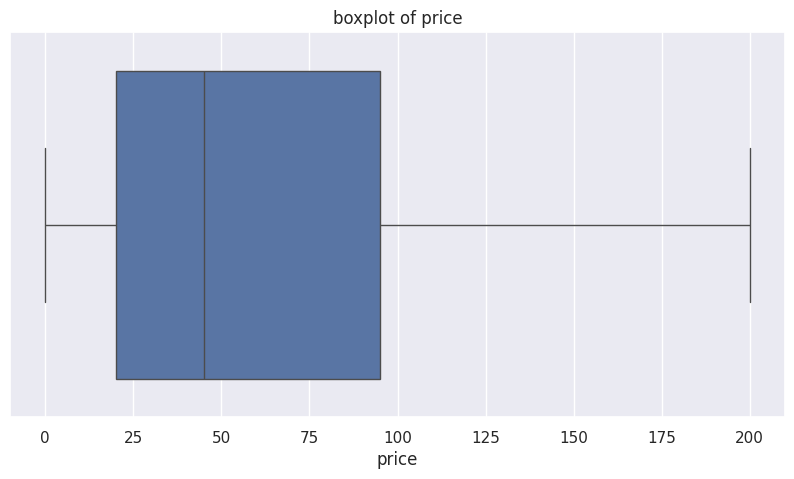

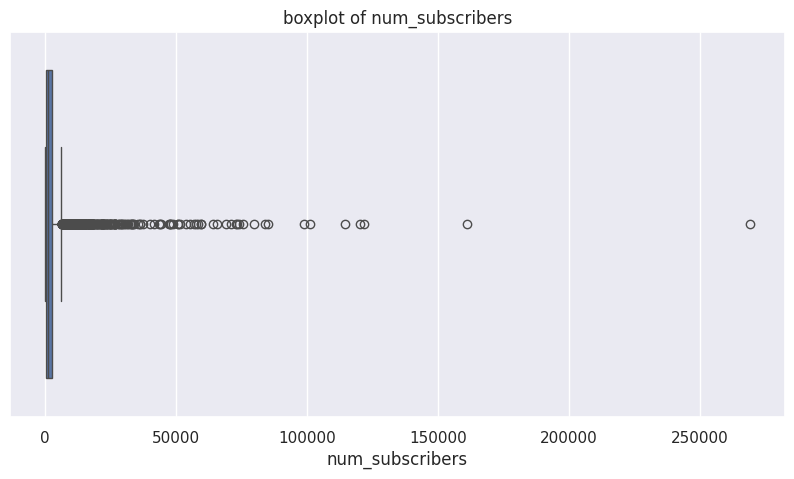

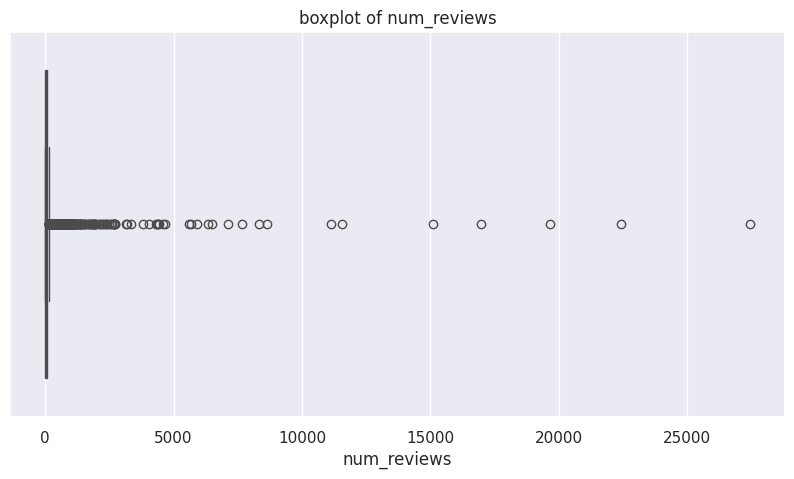

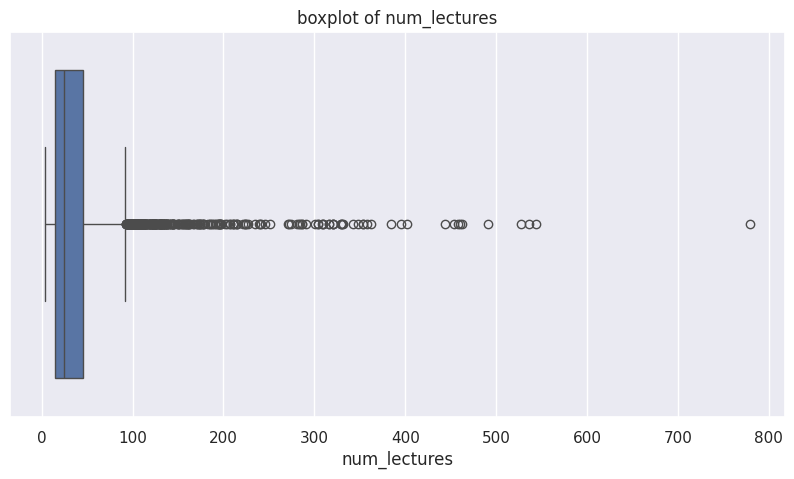

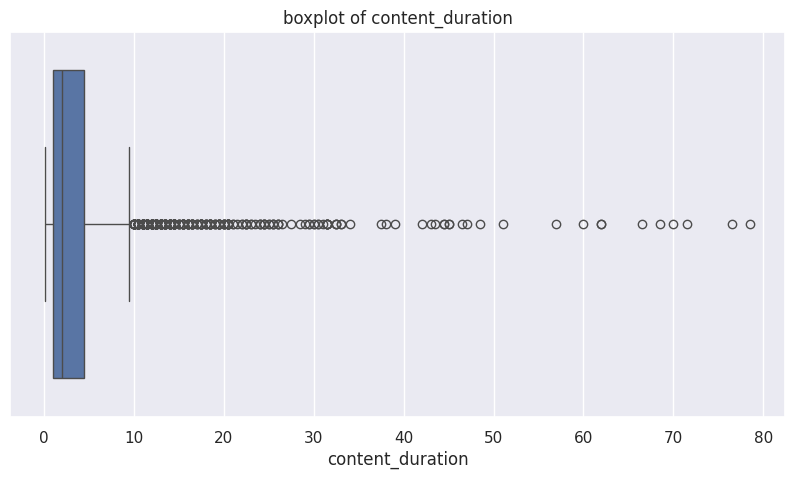

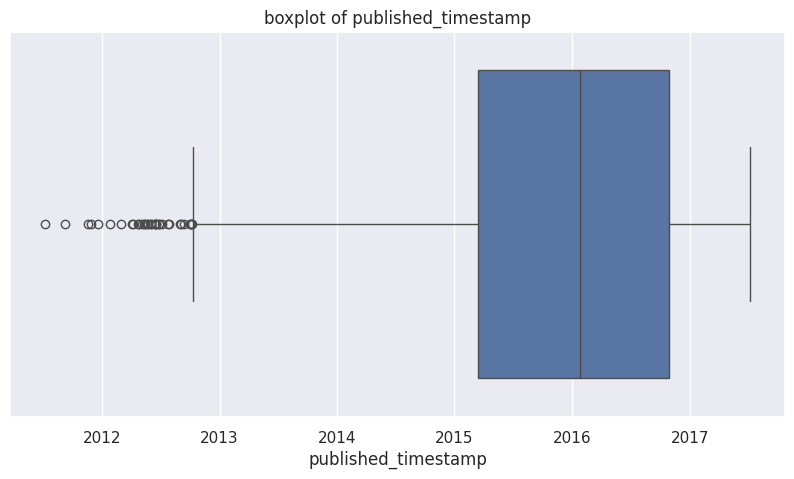

In [16]:
# check outliers

for col in num_df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x= df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

In [17]:
# drop num_lectures more than 700

df= df[df['num_lectures'] < 700]

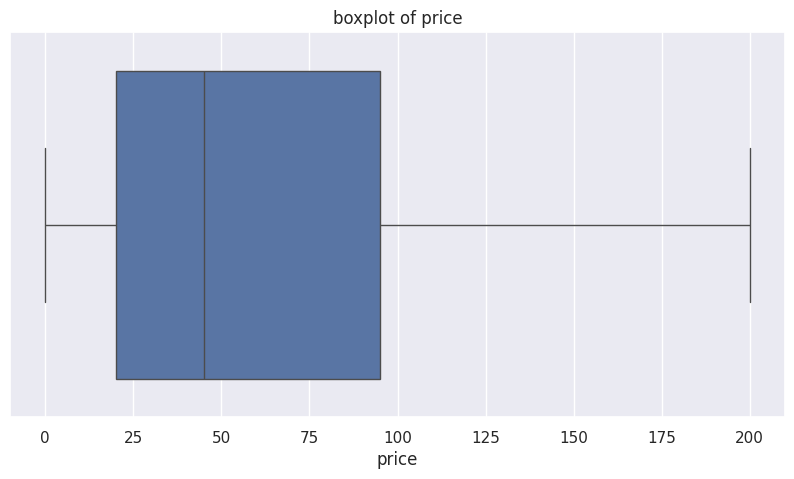

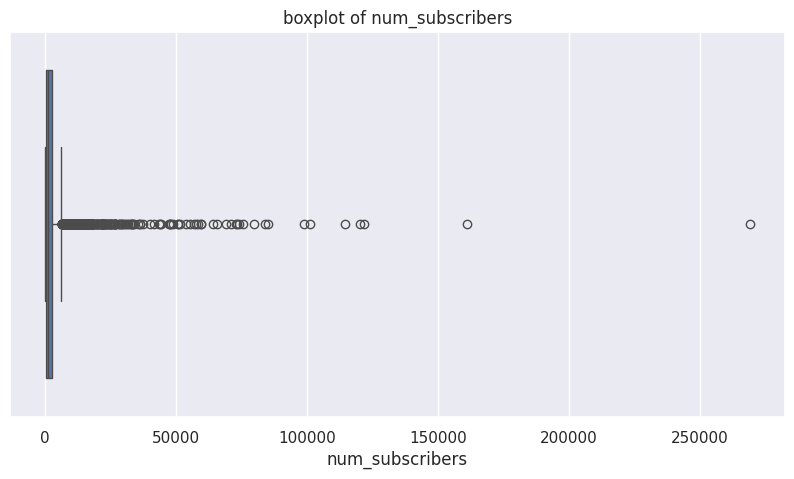

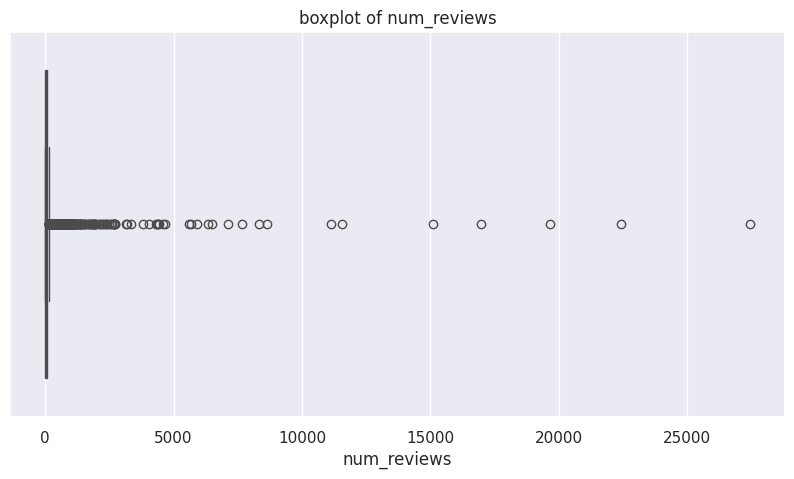

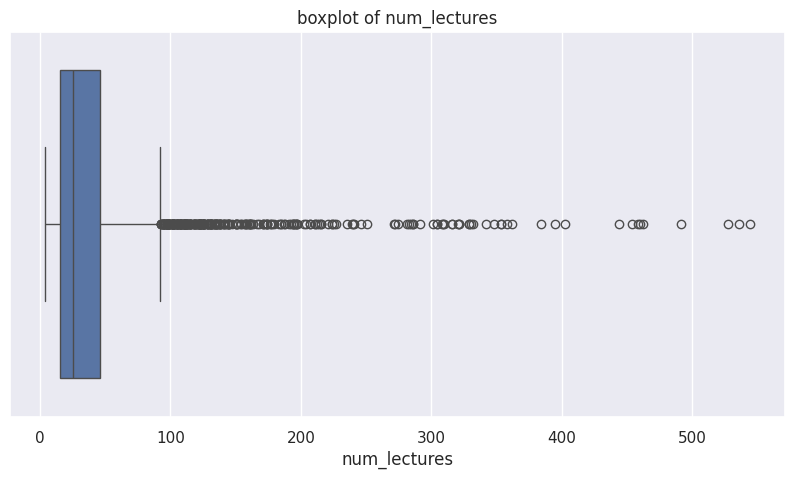

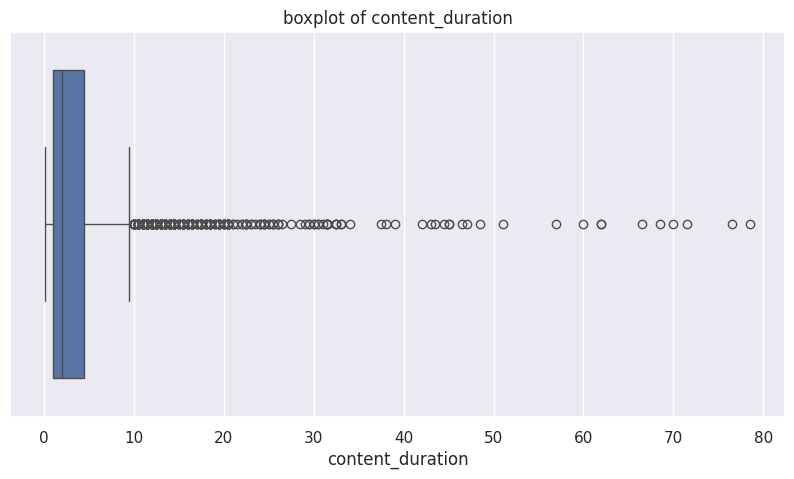

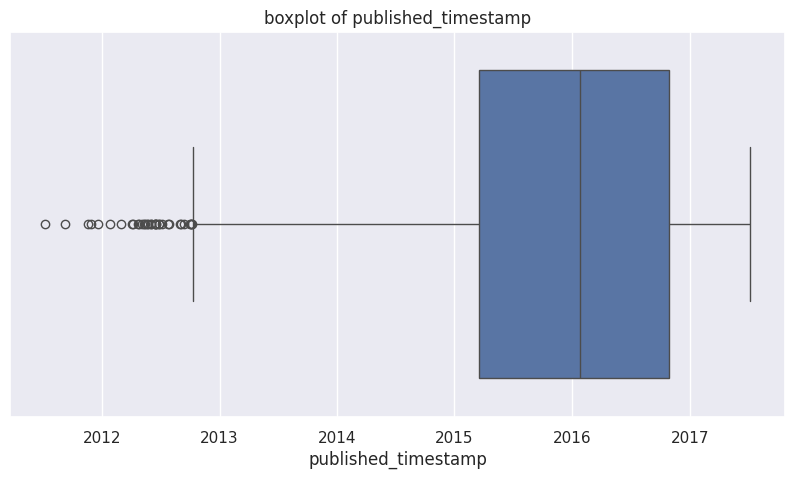

In [18]:
# check outliers

for col in num_df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x= df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

In [19]:
# last check

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3670 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3670 non-null   int64              
 1   course_title         3670 non-null   object             
 2   url                  3670 non-null   object             
 3   is_paid              3670 non-null   bool               
 4   price                3670 non-null   int64              
 5   num_subscribers      3670 non-null   int64              
 6   num_reviews          3670 non-null   int64              
 7   num_lectures         3670 non-null   int64              
 8   level                3670 non-null   object             
 9   content_duration     3670 non-null   float64            
 10  published_timestamp  3670 non-null   datetime64[ns, UTC]
 11  subject              3670 non-null   object             
dtypes: bool(1), datetime64[ns

In [20]:
# there is 3670 entries from 0 to 3677
# reset indexing

df.reset_index(drop=True, inplace=True)

In [21]:
# check again
# now there are 3670 entries from 0 to 3699

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3670 non-null   int64              
 1   course_title         3670 non-null   object             
 2   url                  3670 non-null   object             
 3   is_paid              3670 non-null   bool               
 4   price                3670 non-null   int64              
 5   num_subscribers      3670 non-null   int64              
 6   num_reviews          3670 non-null   int64              
 7   num_lectures         3670 non-null   int64              
 8   level                3670 non-null   object             
 9   content_duration     3670 non-null   float64            
 10  published_timestamp  3670 non-null   datetime64[ns, UTC]
 11  subject              3670 non-null   object             
dtypes: bool(1), datetime

# Data Analysis

In [22]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [23]:
# drop unnessesary columns

df.drop(columns= ['url', 'course_title'], inplace=True)

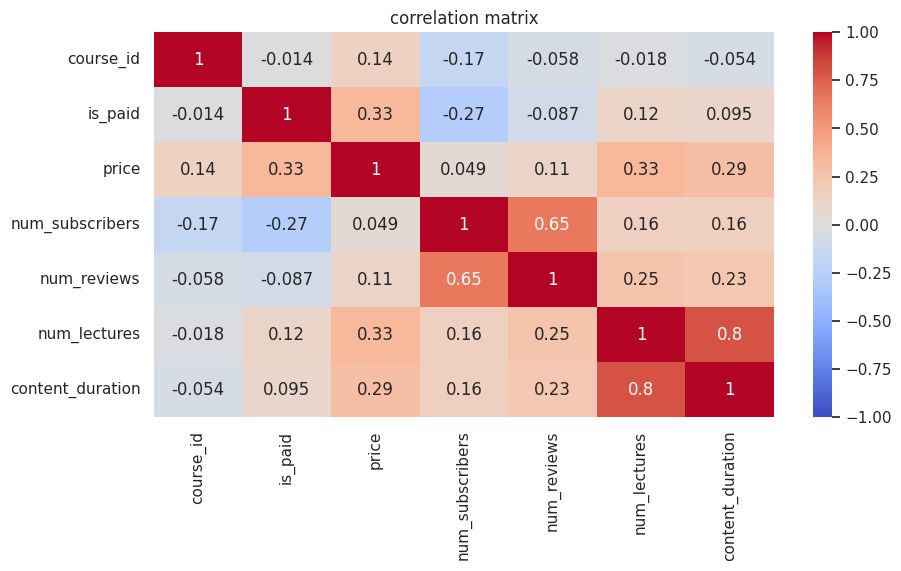

In [24]:
# visulization

plt.figure(figsize=(10,5))

sns.heatmap(data= df.corr(numeric_only= True),
            annot= True,
            cmap='coolwarm',
            vmax= 1,
            vmin= -1)
plt.title('correlation matrix')

plt.show()

In [25]:
# calculate new column 'profit' if is_paid column True
for x in df.index:
    if df.loc[x, 'is_paid'] == True:
        df.loc[x, 'profit'] = df.loc[x, 'price'] * df.loc[x, 'num_subscribers']
    else:
        df.loc[x, 'profit'] = 0

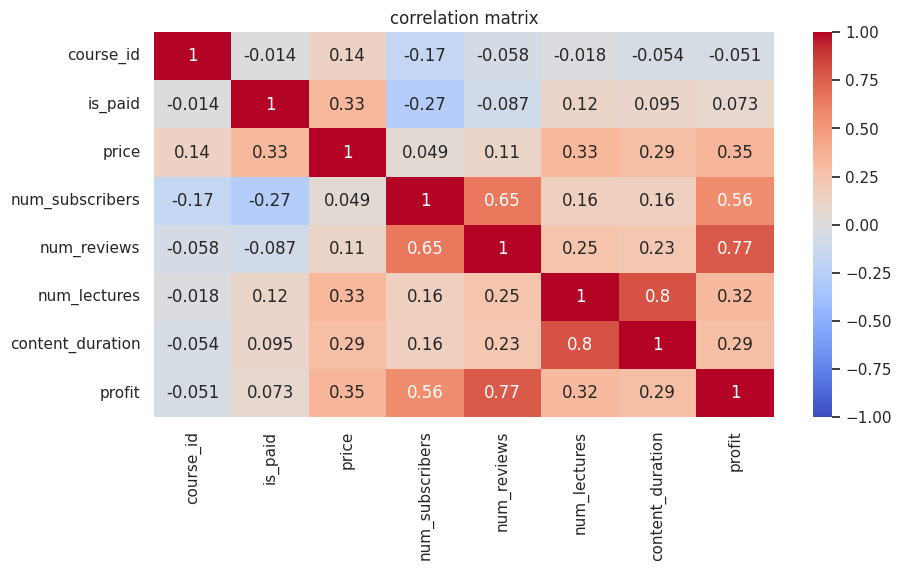

In [26]:
plt.figure(figsize=(10,5))

sns.heatmap(data= df.corr(numeric_only= True), annot= True, cmap='coolwarm', vmax= 1, vmin= -1)
plt.title('correlation matrix')

plt.show()

In [27]:
# analyze subject column

print(df['subject'].value_counts().sort_values(ascending=False))

subject
Web Development        1198
Business Finance       1190
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64


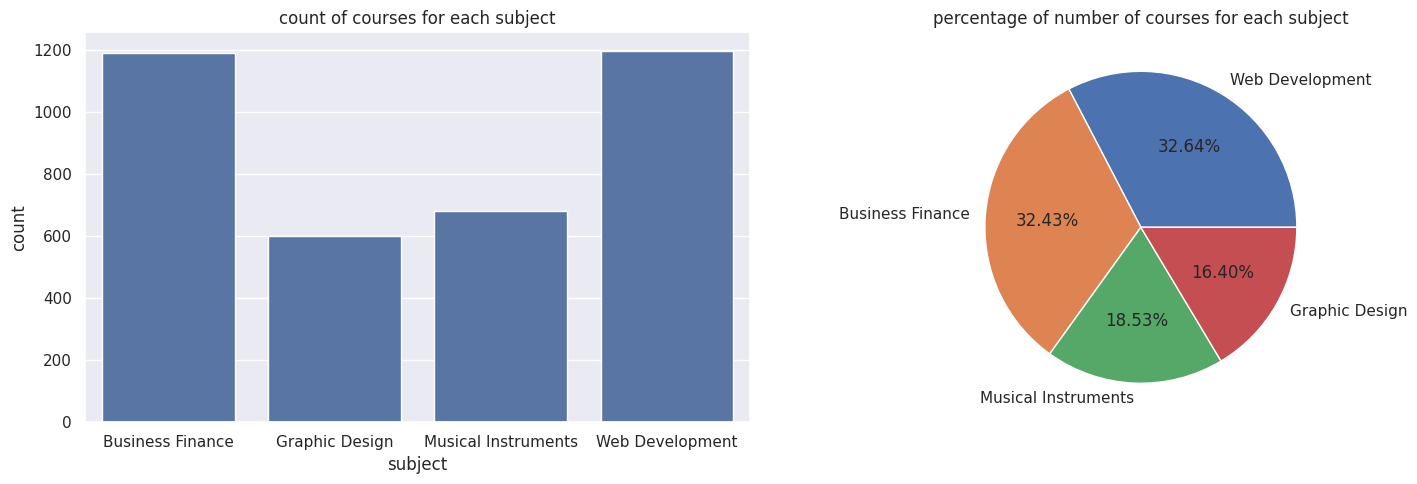

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data= df, x= 'subject')
plt.title('count of courses for each subject')

plt.subplot(1, 2, 2)
plt.pie(x= df['subject'].value_counts().values,
        labels= df['subject'].value_counts().index,
        autopct= '%.2f%%')
plt.title('percentage of number of courses for each subject')

plt.tight_layout()
plt.show()

In [29]:
# analyze subject with level & course_id

print(df.groupby(['subject', 'level'], as_index= False).agg({'course_id': 'count'}).sort_values(by= ['subject', 'course_id'], ascending=[True, False]))

                subject               level  course_id
0      Business Finance          All Levels        692
1      Business Finance      Beginner Level        339
3      Business Finance  Intermediate Level        128
2      Business Finance        Expert Level         31
4        Graphic Design          All Levels        298
5        Graphic Design      Beginner Level        242
7        Graphic Design  Intermediate Level         57
6        Graphic Design        Expert Level          5
9   Musical Instruments      Beginner Level        296
8   Musical Instruments          All Levels        276
11  Musical Instruments  Intermediate Level        101
10  Musical Instruments        Expert Level          7
12      Web Development          All Levels        658
13      Web Development      Beginner Level        390
15      Web Development  Intermediate Level        135
14      Web Development        Expert Level         15


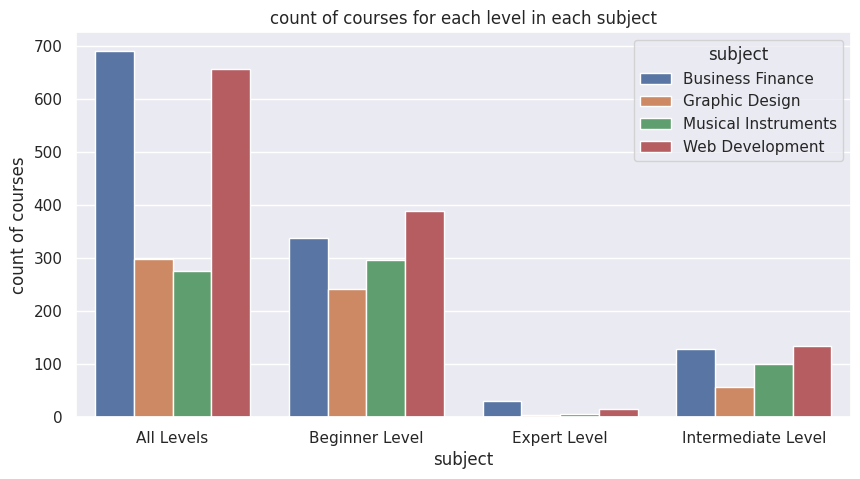

In [30]:
vis_df= df.groupby(['subject', 'level'], as_index= False).agg({'course_id': 'count'})

plt.figure(figsize=(10,5))
sns.barplot(data= vis_df,
            x= 'level',
            y= 'course_id',
            hue= 'subject')
plt.title('count of courses for each level in each subject')
plt.ylabel('count of courses')
plt.xlabel('subject')
plt.show()

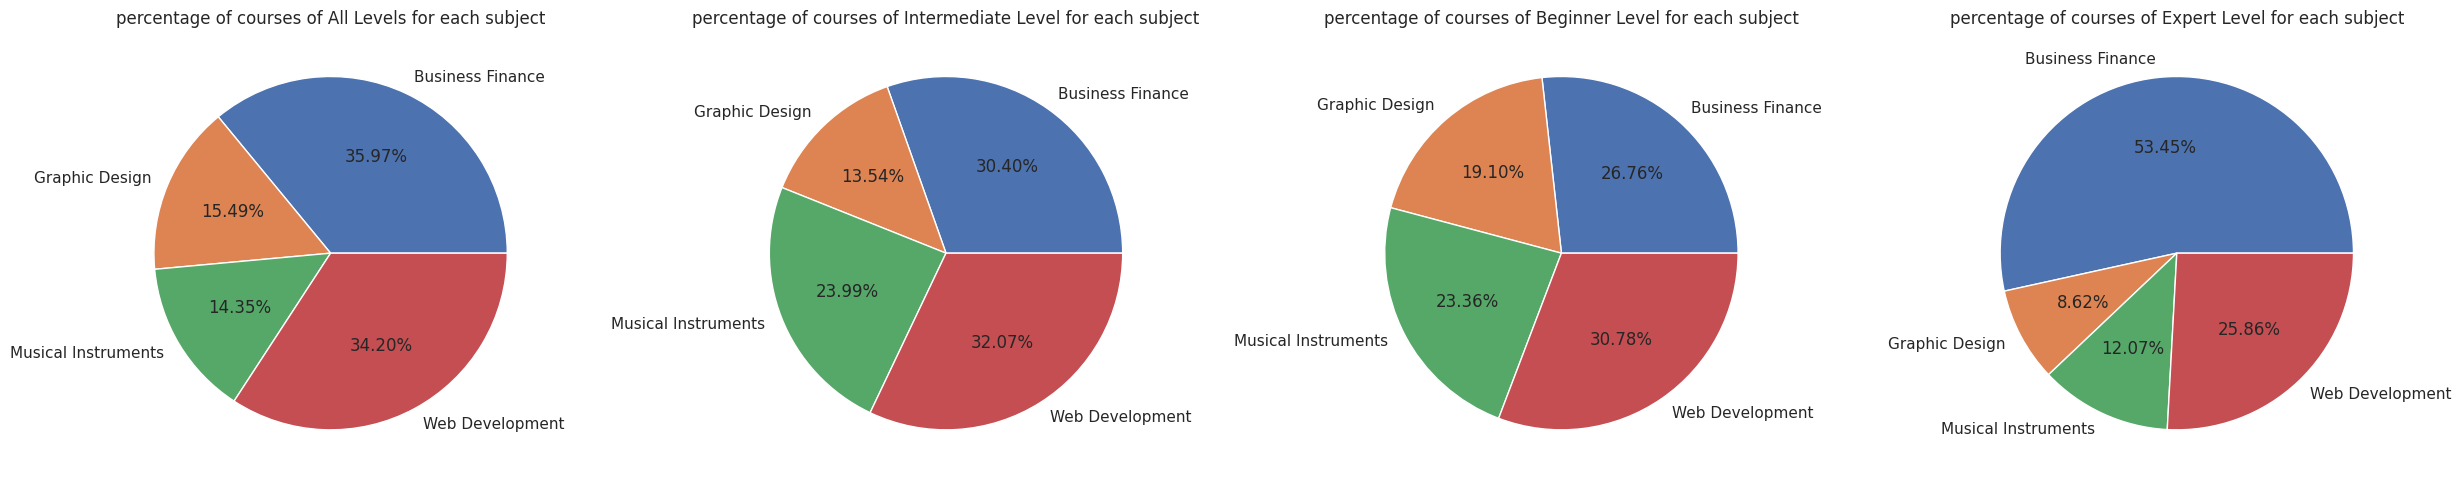

In [31]:
i= 1 # create increaser
plt.figure(figsize=(25,5))

for lvl in df['level'].unique(): # create loop with unique values of level column
    plt.subplot(1, len(df['level'].unique()), i) # make figure as subplots
    plt.pie(data= df[df['level'] == lvl].groupby('subject', as_index= False).agg({'course_id': 'count'}),
            x= 'course_id',
            labels= 'subject',
            autopct= '%1.2f%%') # vis with plt pie chart
    plt.title(f'percentage of courses of {lvl} for each subject')
    i= i+1 # increase by 1

plt.tight_layout()
plt.show()

In [32]:
# Analyze num_subscribers & subject

print(df.groupby('subject', as_index= False).agg({'num_subscribers': 'sum'}).sort_values(by= 'num_subscribers', ascending=False))

               subject  num_subscribers
3      Web Development          7919117
0     Business Finance          1868711
1       Graphic Design          1063148
2  Musical Instruments           846689


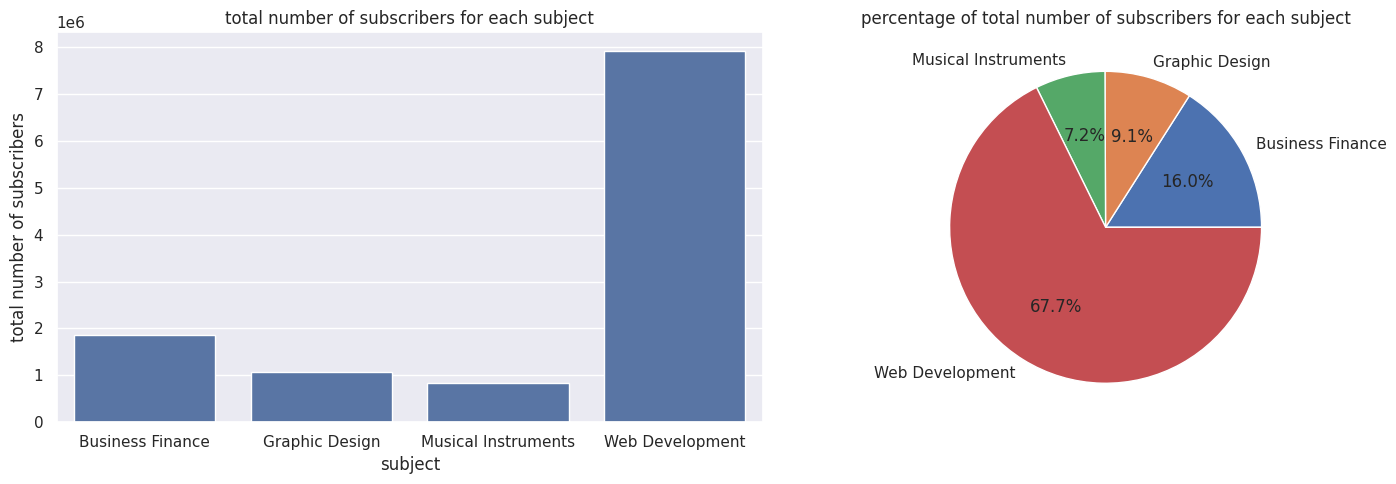

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.barplot(data= df.groupby('subject', as_index= False).agg({'num_subscribers': 'sum'}),
            x= 'subject',
            y= 'num_subscribers')
plt.title('total number of subscribers for each subject')
plt.ylabel('total number of subscribers')
plt.xlabel('subject')

plt.subplot(1, 2, 2)
plt.pie(x= df.groupby('subject', as_index= False).agg({'num_subscribers': 'sum'})['num_subscribers'],
        labels= df.groupby('subject', as_index= False).agg({'num_subscribers': 'sum'})['subject'],
        autopct= '%1.1f%%')
plt.title('percentage of total number of subscribers for each subject')

plt.tight_layout()
plt.show()

In [34]:
# analyze subject with num_subscribers & level

print(df.groupby(['subject', 'level'], as_index= False).agg({'num_subscribers': 'sum'}).sort_values(by= ['subject', 'num_subscribers'], ascending= [True, False]))

                subject               level  num_subscribers
0      Business Finance          All Levels          1047208
1      Business Finance      Beginner Level           647007
3      Business Finance  Intermediate Level           144350
2      Business Finance        Expert Level            30146
4        Graphic Design          All Levels           688332
5        Graphic Design      Beginner Level           315757
7        Graphic Design  Intermediate Level            58051
6        Graphic Design        Expert Level             1008
9   Musical Instruments      Beginner Level           429030
8   Musical Instruments          All Levels           328170
11  Musical Instruments  Intermediate Level            84058
10  Musical Instruments        Expert Level             5431
12      Web Development          All Levels          4808081
13      Web Development      Beginner Level          2641879
15      Web Development  Intermediate Level           455546
14      Web Development 

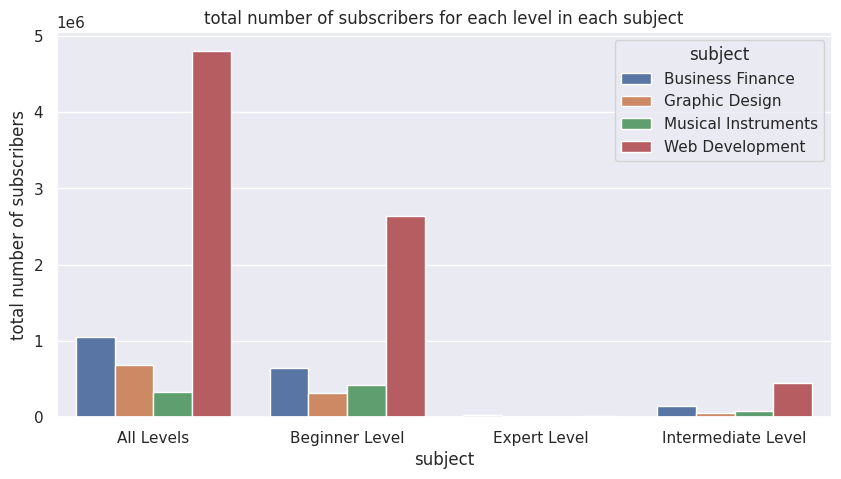

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data= df.groupby(['subject', 'level'], as_index= False).agg({'num_subscribers': 'sum'}),
            x= 'level',
            y= 'num_subscribers',
            hue= 'subject')
plt.title('total number of subscribers for each level in each subject')
plt.ylabel('total number of subscribers')
plt.xlabel('subject')
plt.show()

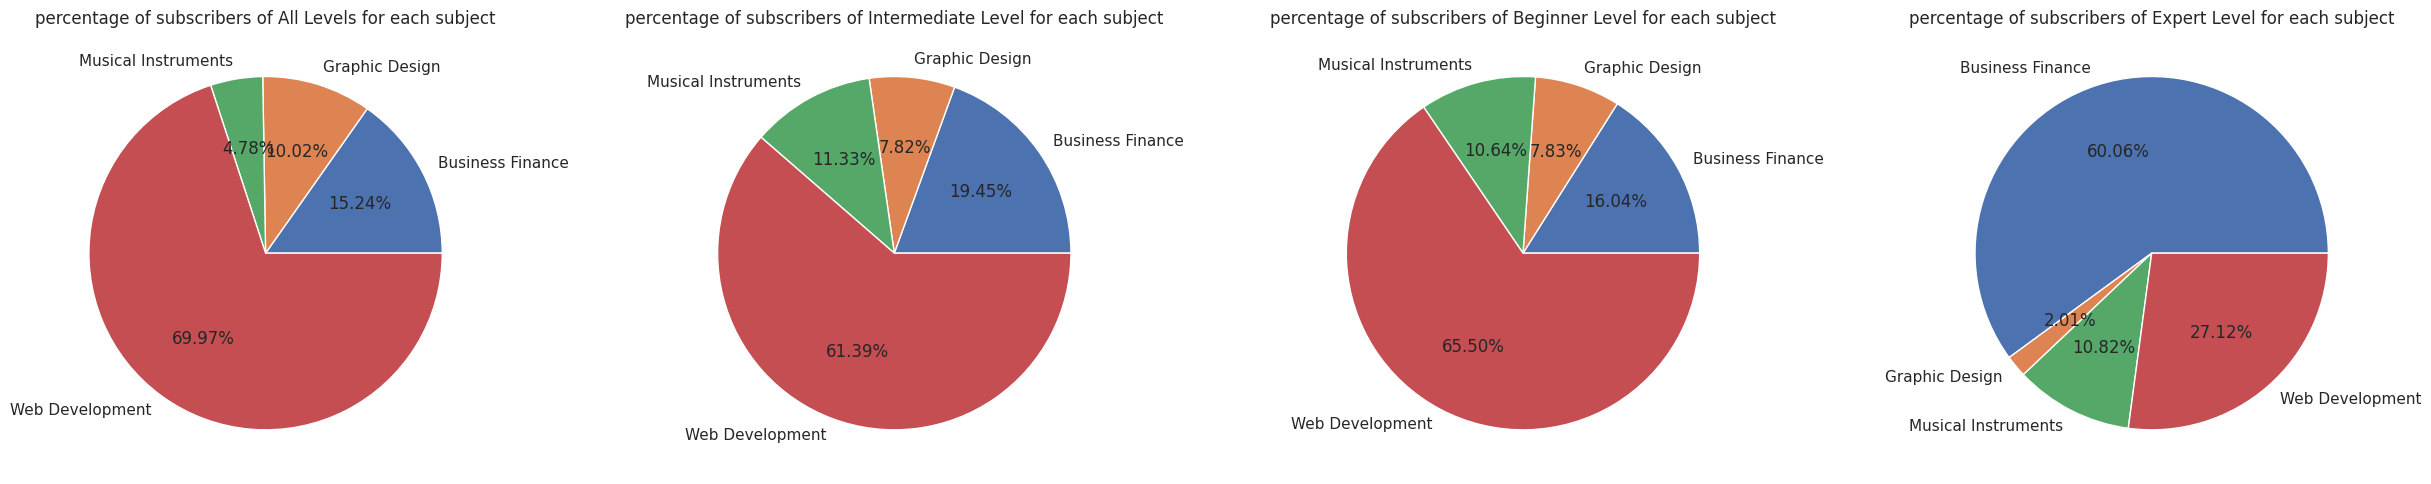

In [36]:
i= 1
plt.figure(figsize=(25,5))

for lvl in df['level'].unique():
    plt.subplot(1, len(df['level'].unique()), i)
    plt.pie(data= df[df['level'] == lvl].groupby('subject', as_index= False).agg({'num_subscribers': 'sum'}),
            x= 'num_subscribers',
            labels= 'subject',
            autopct= '%1.2f%%')
    plt.title(f'percentage of subscribers of {lvl} for each subject')
    i+=1

plt.tight_layout()
plt.show()

In [37]:
# analyze subject with level & is_paid

print(df.groupby(['subject', 'level', 'is_paid'], as_index= False).agg({'course_id': 'count'}).sort_values(by= ['subject', 'is_paid', 'course_id'], ascending= [True, True, False]))

                subject               level  is_paid  course_id
0      Business Finance          All Levels    False         50
2      Business Finance      Beginner Level    False         40
5      Business Finance  Intermediate Level    False          6
1      Business Finance          All Levels     True        642
3      Business Finance      Beginner Level     True        299
6      Business Finance  Intermediate Level     True        122
4      Business Finance        Expert Level     True         31
9        Graphic Design      Beginner Level    False         18
7        Graphic Design          All Levels    False         15
12       Graphic Design  Intermediate Level    False          2
8        Graphic Design          All Levels     True        283
10       Graphic Design      Beginner Level     True        224
13       Graphic Design  Intermediate Level     True         55
11       Graphic Design        Expert Level     True          5
16  Musical Instruments      Beginner Le

In [38]:
px.bar(data_frame= df.groupby(['subject', 'level', 'is_paid'], as_index= False).agg({'course_id': 'count'}),
       x= 'level',
       y= 'course_id',
       color= 'is_paid',
       facet_col= 'subject',
       barmode= 'group',
       title= 'num of paid courses in level for each subject')

In [39]:
# analyze subject with level & num_reviews

print(df.groupby(['subject', 'level'], as_index= False).agg({'num_reviews': 'sum'}).sort_values(by= ['subject', 'num_reviews'], ascending= [True, False]))

                subject               level  num_reviews
0      Business Finance          All Levels        39736
1      Business Finance      Beginner Level        28242
3      Business Finance  Intermediate Level         6757
2      Business Finance        Expert Level         1167
4        Graphic Design          All Levels        19456
5        Graphic Design      Beginner Level        15784
7        Graphic Design  Intermediate Level         1773
6        Graphic Design        Expert Level           57
8   Musical Instruments          All Levels        16787
9   Musical Instruments      Beginner Level        10347
11  Musical Instruments  Intermediate Level         4442
10  Musical Instruments        Expert Level          148
12      Web Development          All Levels       327793
13      Web Development      Beginner Level        74585
15      Web Development  Intermediate Level        26044
14      Web Development        Expert Level          961


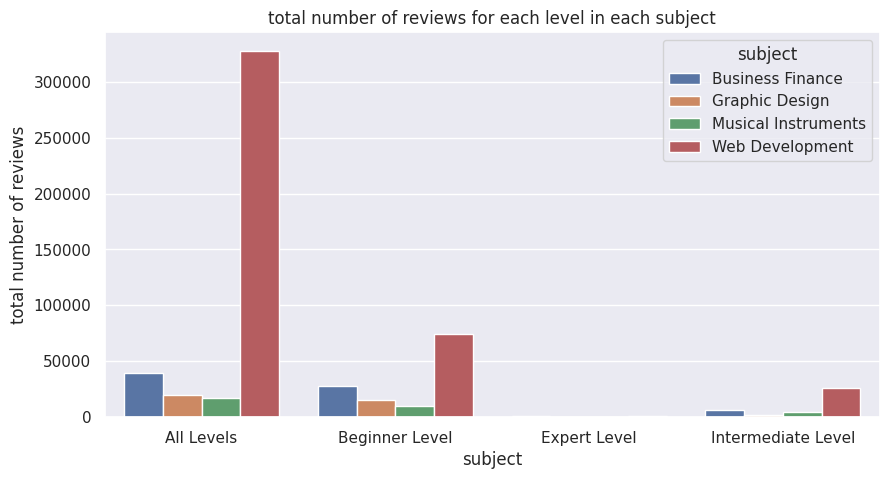

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data= df.groupby(['subject', 'level'], as_index= False).agg({'num_reviews': 'sum'}),
            x= 'level',
            y= 'num_reviews',
            hue= 'subject')
plt.title('total number of reviews for each level in each subject')
plt.ylabel('total number of reviews')
plt.xlabel('subject')
plt.show()

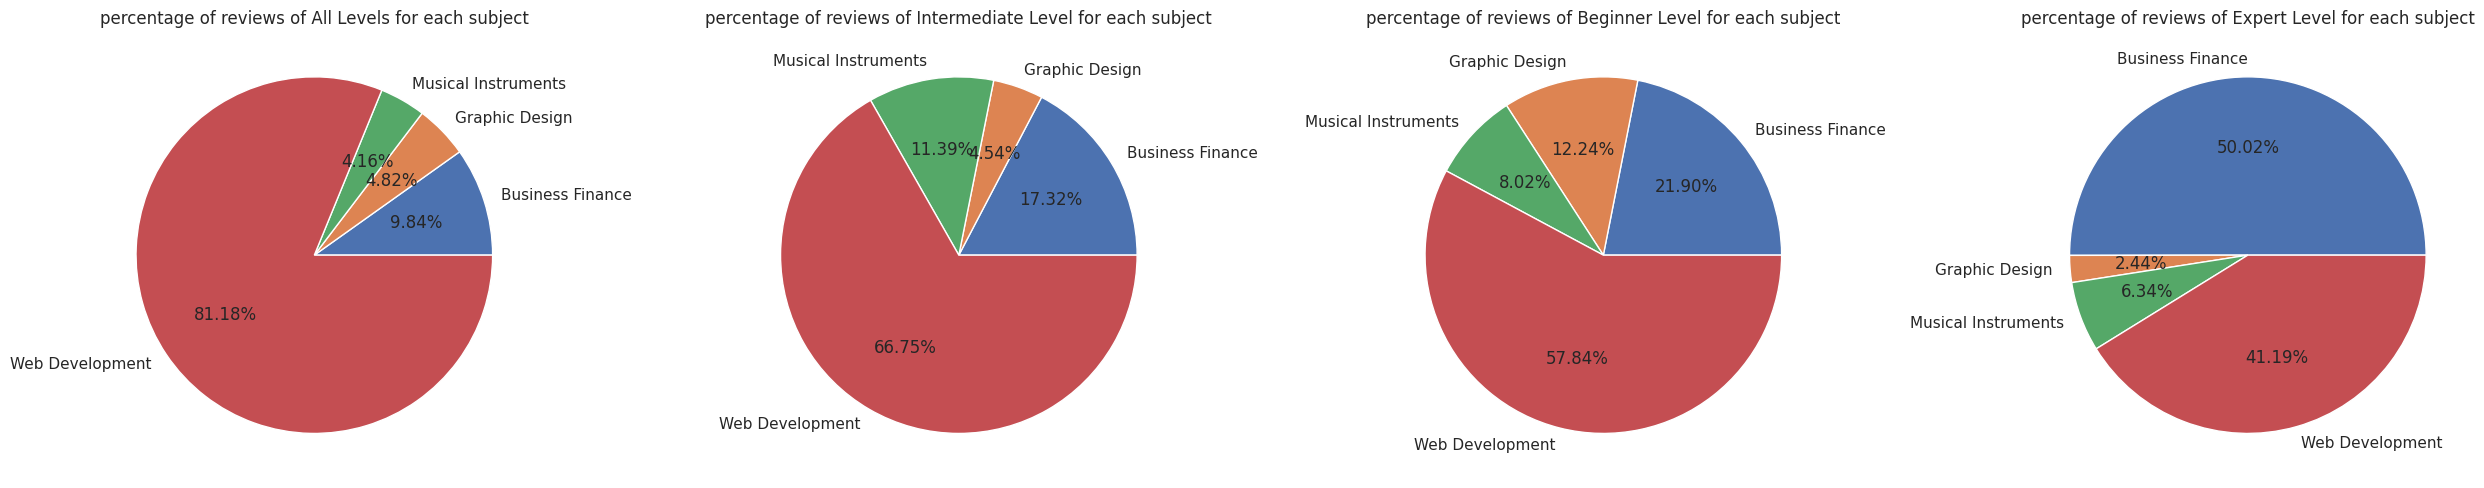

In [41]:
i= 1
plt.figure(figsize=(25,15))

for lvl in df['level'].unique():
    plt.subplot(1, len(df['level'].unique()), i)
    plt.pie(data= df[df['level'] == lvl].groupby('subject', as_index= False).agg({'num_reviews': 'sum'}),
            x= 'num_reviews',
            labels= 'subject',
            autopct= '%1.2f%%')
    plt.title(f'percentage of reviews of {lvl} for each subject')
    i+=1

plt.tight_layout()
plt.show()

In [42]:
# analyze subject & profit

print(df.groupby('subject', as_index= False).agg({'profit': 'sum'}).sort_values(by= 'profit', ascending=False))

               subject       profit
3      Web Development  623963400.0
0     Business Finance  123735315.0
1       Graphic Design   76983170.0
2  Musical Instruments   53359055.0


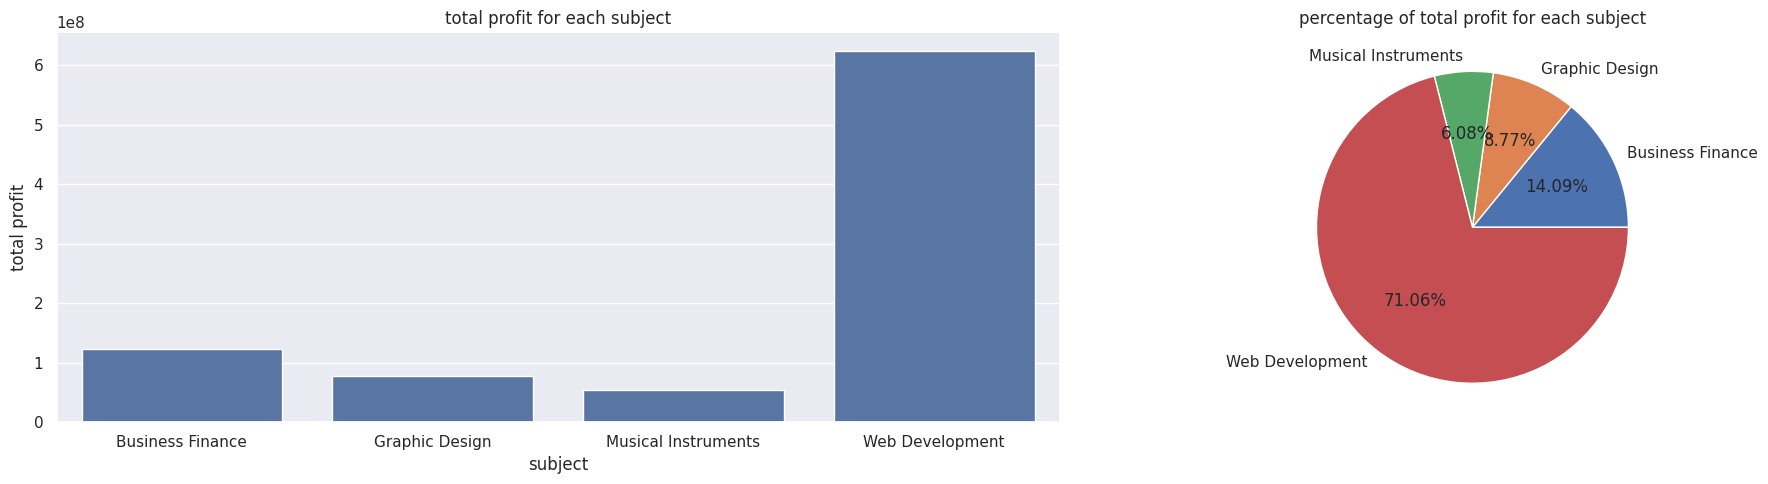

In [43]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.barplot(data= df.groupby('subject', as_index= False).agg({'profit': 'sum'}),
            x= 'subject',
            y= 'profit')
plt.title('total profit for each subject')
plt.ylabel('total profit')
plt.xlabel('subject')

plt.subplot(1, 2, 2)
plt.pie(data= df.groupby('subject', as_index= False).agg({'profit': 'sum'}),
        x= df.groupby('subject', as_index= False).agg({'profit': 'sum'})['profit'],
        labels= df.groupby('subject', as_index= False).agg({'profit': 'sum'})['subject'],
        autopct= '%1.2f%%')
plt.title('percentage of total profit for each subject')

plt.tight_layout()
plt.show()


In [44]:
# analyze subject with profit & level

print(df.groupby(['subject', 'level'], as_index= False).agg({'profit': 'sum'}).sort_values(by= ['subject', 'profit']))

                subject               level       profit
2      Business Finance        Expert Level    4029835.0
3      Business Finance  Intermediate Level    8370570.0
1      Business Finance      Beginner Level   27250145.0
0      Business Finance          All Levels   84084765.0
6        Graphic Design        Expert Level      25335.0
7        Graphic Design  Intermediate Level    2966035.0
5        Graphic Design      Beginner Level   26554730.0
4        Graphic Design          All Levels   47437070.0
10  Musical Instruments        Expert Level     264175.0
11  Musical Instruments  Intermediate Level    4120100.0
9   Musical Instruments      Beginner Level   10427590.0
8   Musical Instruments          All Levels   38547190.0
14      Web Development        Expert Level    1149725.0
15      Web Development  Intermediate Level   34277430.0
13      Web Development      Beginner Level  151811875.0
12      Web Development          All Levels  436724370.0


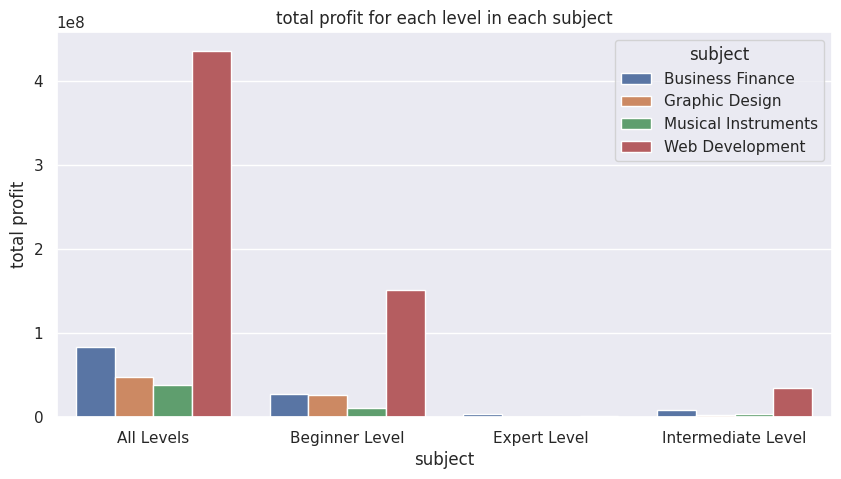

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data= df.groupby(['subject', 'level'], as_index= False).agg({'profit': 'sum'}),
            x= 'level',
            y= 'profit',
            hue= 'subject')
plt.title('total profit for each level in each subject')
plt.ylabel('total profit')
plt.xlabel('subject')
plt.show()

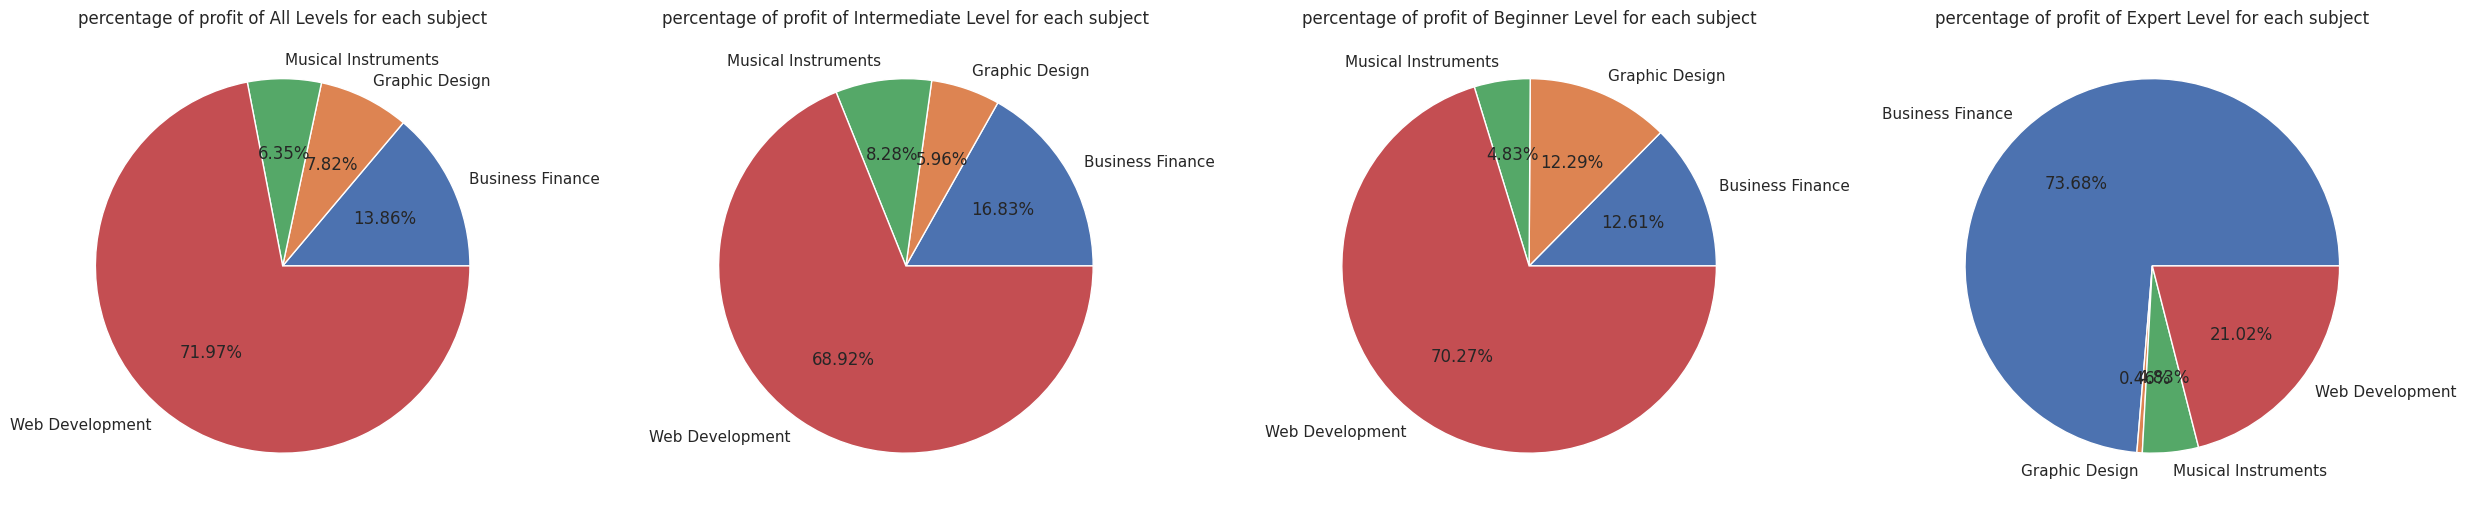

In [46]:
i= 1
plt.figure(figsize=(25,10))

for lvl in df['level'].unique():
    plt.subplot(1, len(df['level'].unique()), i)
    plt.pie(data= df[df['level'] == lvl].groupby('subject', as_index= False).agg({'profit': 'sum'}),
            x= 'profit',
            labels= 'subject',
            autopct= '%1.2f%%')
    plt.title(f'percentage of profit of {lvl} for each subject')
    i+=1

plt.tight_layout()
plt.show()

# Time Series Analysis

In [47]:
# split published_timestamp to date & time

df[['date', 'time']]= df['published_timestamp'].astype(str).str.split(pat= ' ', expand= True)

In [48]:
df.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,date,time
0,1070968,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,429400.0,2017-01-18,20:58:58+00:00
1,1113822,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,209400.0,2017-03-09,16:34:20+00:00
2,1006314,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,97830.0,2016-12-19,19:26:30+00:00
3,1210588,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,232845.0,2017-05-30,20:07:24+00:00
4,1011058,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,255200.0,2016-12-13,14:57:18+00:00


In [93]:
# check of null values after convert to date with out time

print(f"sum of null values after convert= {pd.to_datetime(df['date'], format= '%Y-%m-%d').isna().sum()}")

sum of null values after convert= 0


In [50]:
# convert to date with out time

df['date']= pd.to_datetime(df['date'], format= '%Y-%m-%d')

In [95]:
print(f"data type is: {df['date'].dtype}")

data type is: datetime64[ns]


In [52]:
# drop unnessesary column

df_date= df.drop(columns= ['time', 'published_timestamp'])

In [53]:
df_date.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,date
0,1070968,True,200,2147,23,51,All Levels,1.5,Business Finance,429400.0,2017-01-18
1,1113822,True,75,2792,923,274,All Levels,39.0,Business Finance,209400.0,2017-03-09
2,1006314,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,97830.0,2016-12-19
3,1210588,True,95,2451,11,36,All Levels,3.0,Business Finance,232845.0,2017-05-30
4,1011058,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,255200.0,2016-12-13


In [54]:
# set index by date column

df_date.set_index('date', inplace= True)

In [55]:
df_date.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit
date,,,,,,,,,,
2017-01-18,1070968,True,200,2147,23,51,All Levels,1.5,Business Finance,429400.0
2017-03-09,1113822,True,75,2792,923,274,All Levels,39.0,Business Finance,209400.0
2016-12-19,1006314,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,97830.0
2017-05-30,1210588,True,95,2451,11,36,All Levels,3.0,Business Finance,232845.0
2016-12-13,1011058,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,255200.0


In [114]:
# analyze num_subscribers & profit by year

print(df_date.resample('YE').agg({'profit': 'sum', 'num_subscribers': 'sum'}))

                 profit  num_subscribers
date                                    
2011-12-31   11643420.0           119028
2012-12-31   11773470.0           555339
2013-12-31   65771820.0          1661983
2014-12-31  106939045.0          1930406
2015-12-31  314510395.0          3475324
2016-12-31  276633190.0          2966644
2017-12-31   90769600.0           988941


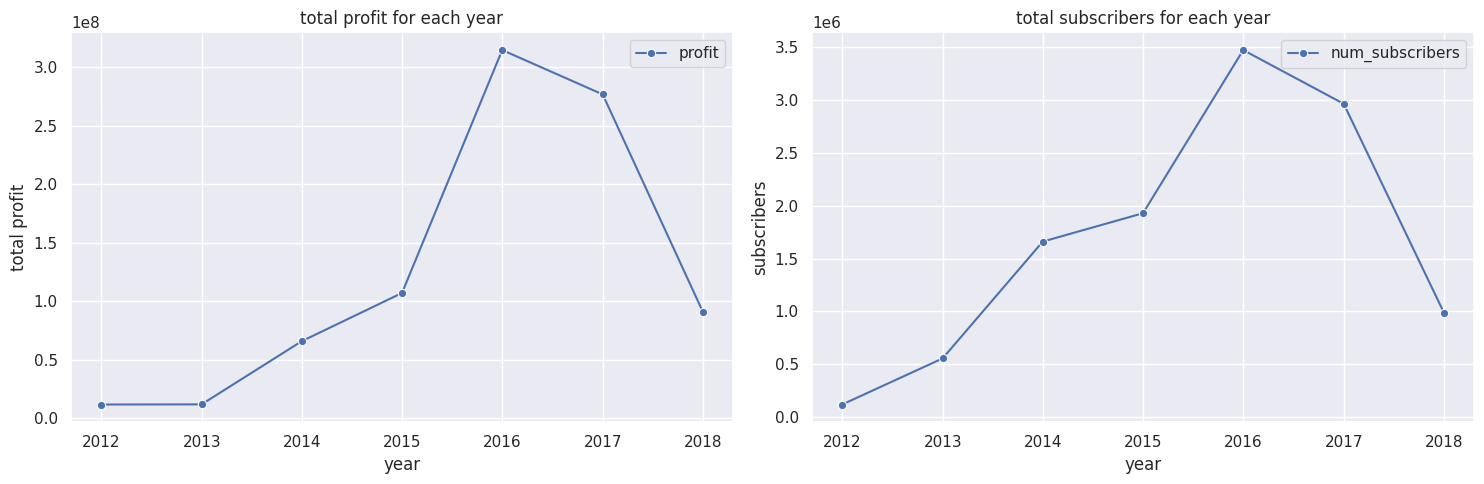

In [113]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.lineplot(data= df_date.resample('YE').agg({'profit': 'sum'}), markers= 'o')
plt.title('total profit for each year')
plt.ylabel('total profit')
plt.xlabel('year')

plt.subplot(1, 2, 2)
sns.lineplot(data= df_date.resample('YE').agg({'num_subscribers': 'sum'}), markers= 'o')
plt.title('total subscribers for each year')
plt.ylabel('subscribers')
plt.xlabel('year')

plt.tight_layout()
plt.show()

In [115]:
# analyze num_subscribers & profit by month in each year

for y in df_date.index.year.unique():
    print(f'for year: {y}')
    print(f"{df_date[df_date.index.year == y].resample('ME').agg({'profit': 'sum', 'num_subscribers': 'sum'})}\n")

for year: 2017
                profit  num_subscribers
date                                   
2017-01-31  16110630.0           195083
2017-02-28  23162005.0           211172
2017-03-31  20726470.0           169289
2017-04-30   6887050.0           114313
2017-05-31  10705375.0           150871
2017-06-30  13098960.0           146515
2017-07-31     79110.0             1698

for year: 2016
                profit  num_subscribers
date                                   
2016-01-31  19435755.0           286494
2016-02-29  30376265.0           330245
2016-03-31  48150030.0           485977
2016-04-30  10456155.0           170084
2016-05-31  27877630.0           236869
2016-06-30  22815120.0           237167
2016-07-31  11374435.0           137802
2016-08-31   9990560.0           196278
2016-09-30  13800750.0           191058
2016-10-31  36868975.0           280535
2016-11-30  27531180.0           238348
2016-12-31  17956335.0           175787

for year: 2014
                profit  num_subsc

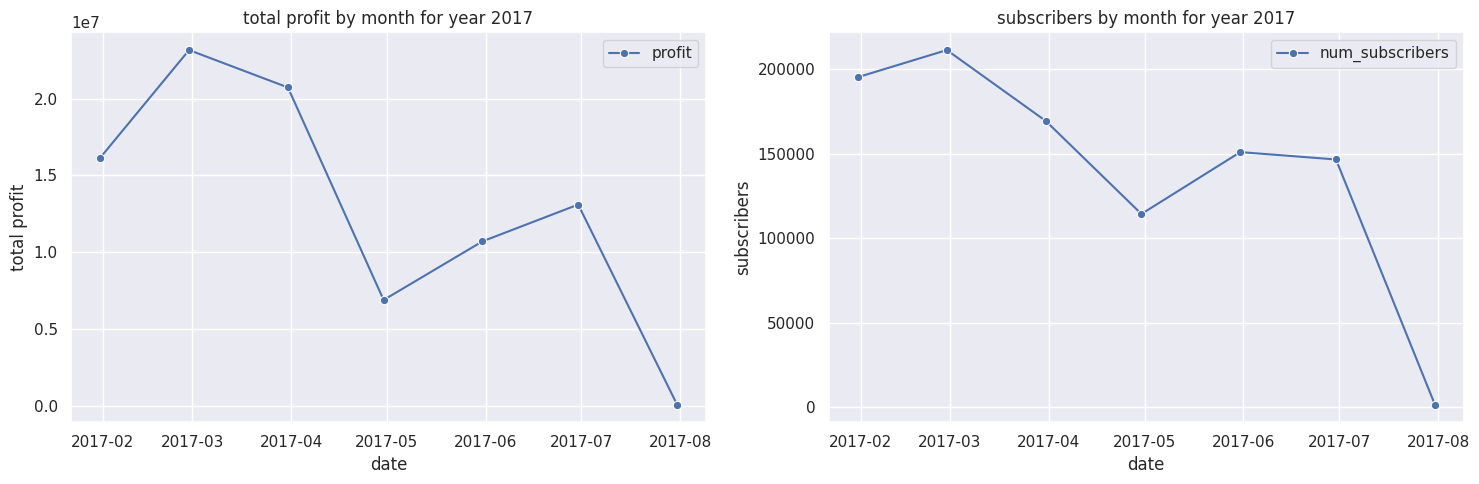

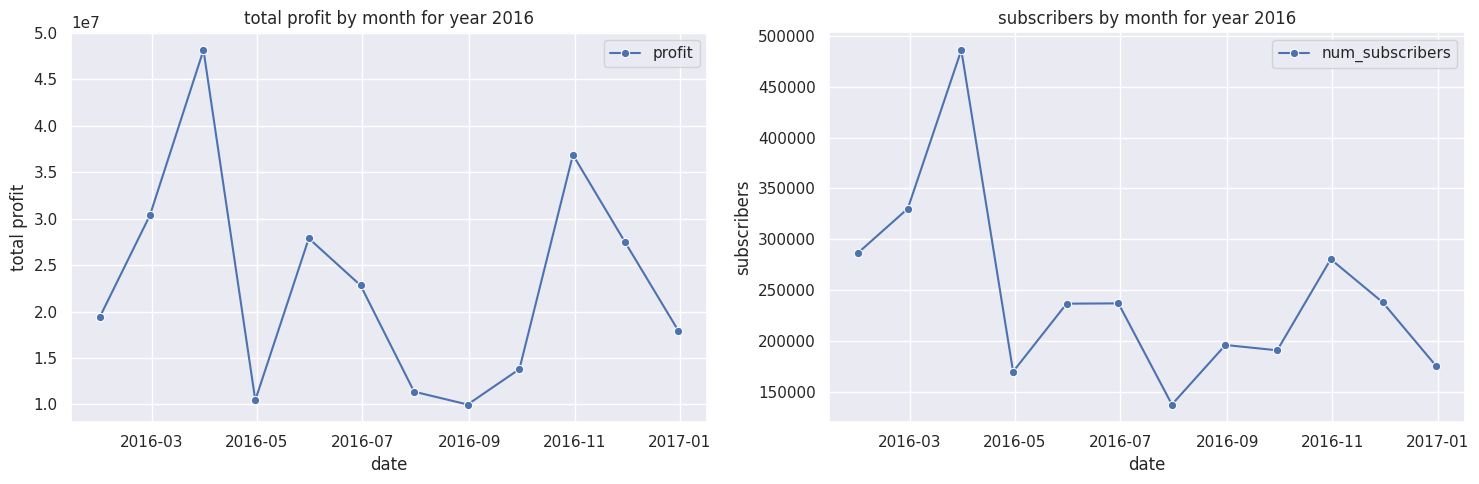

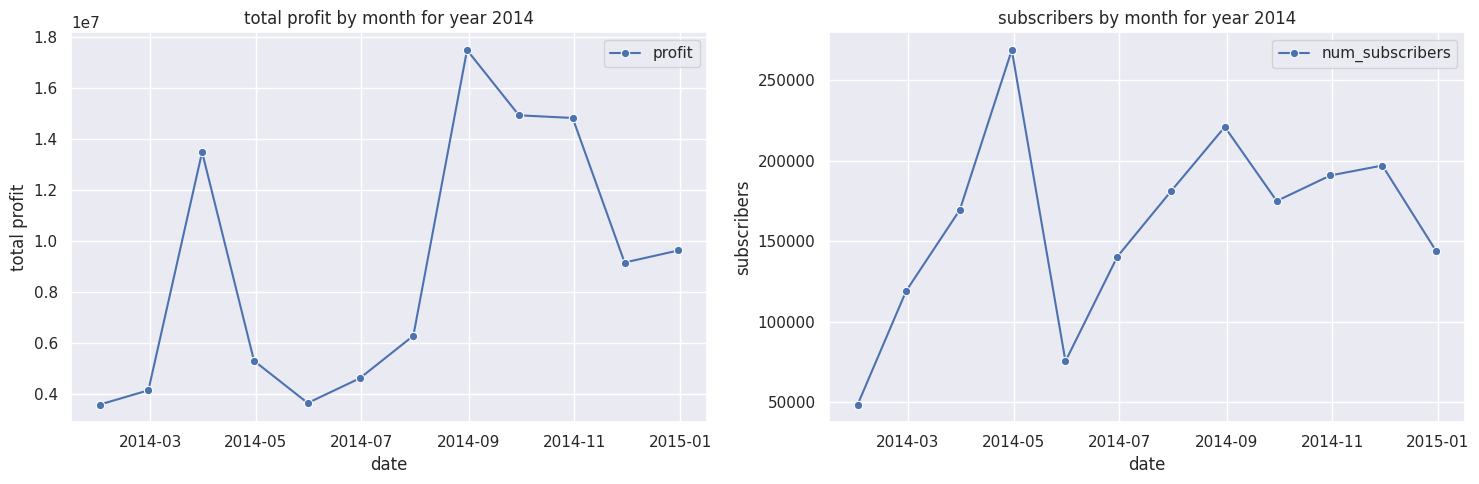

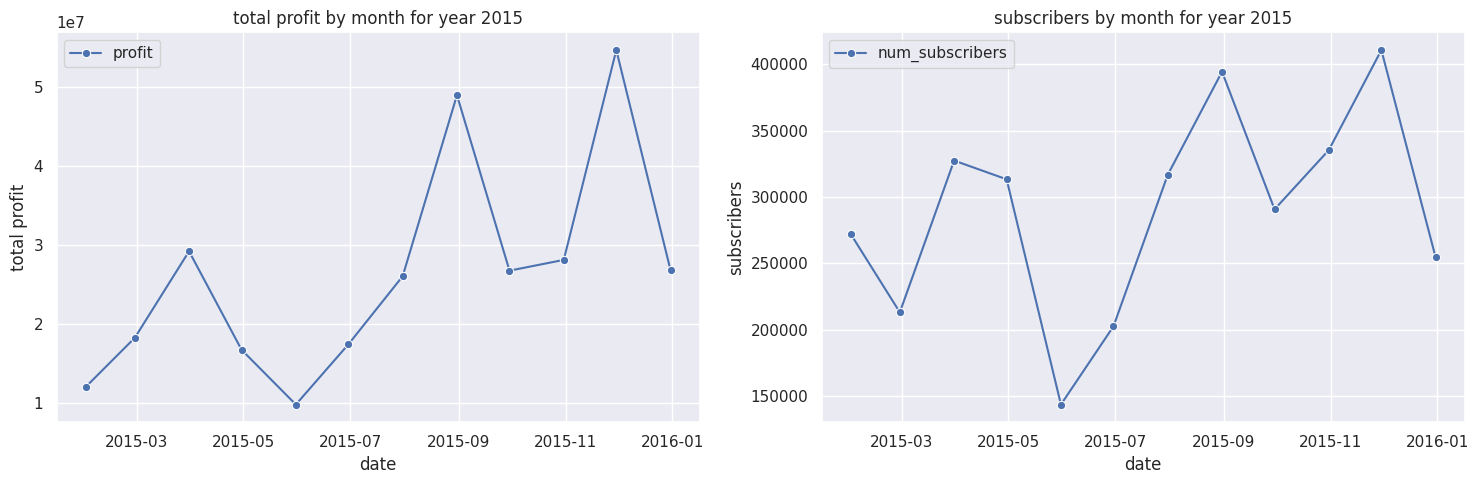

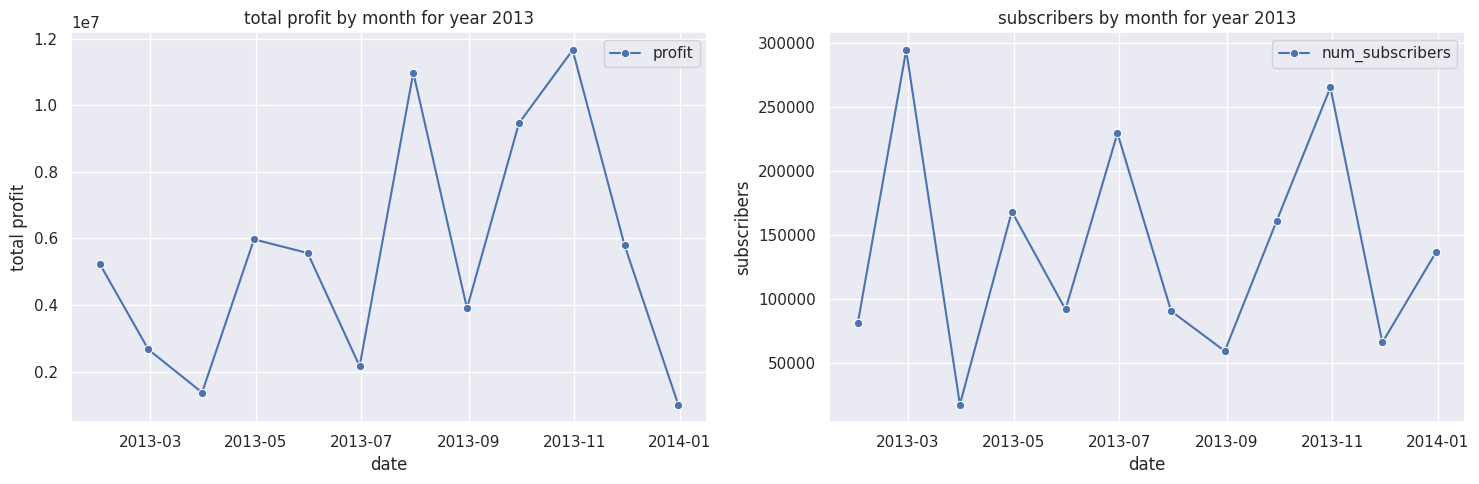

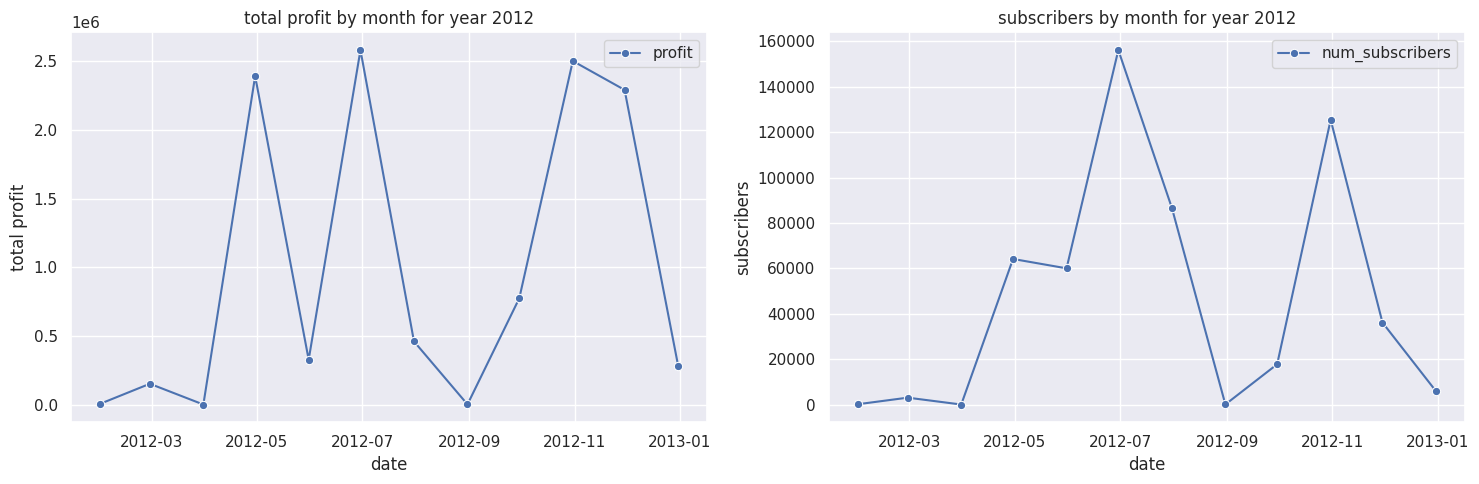

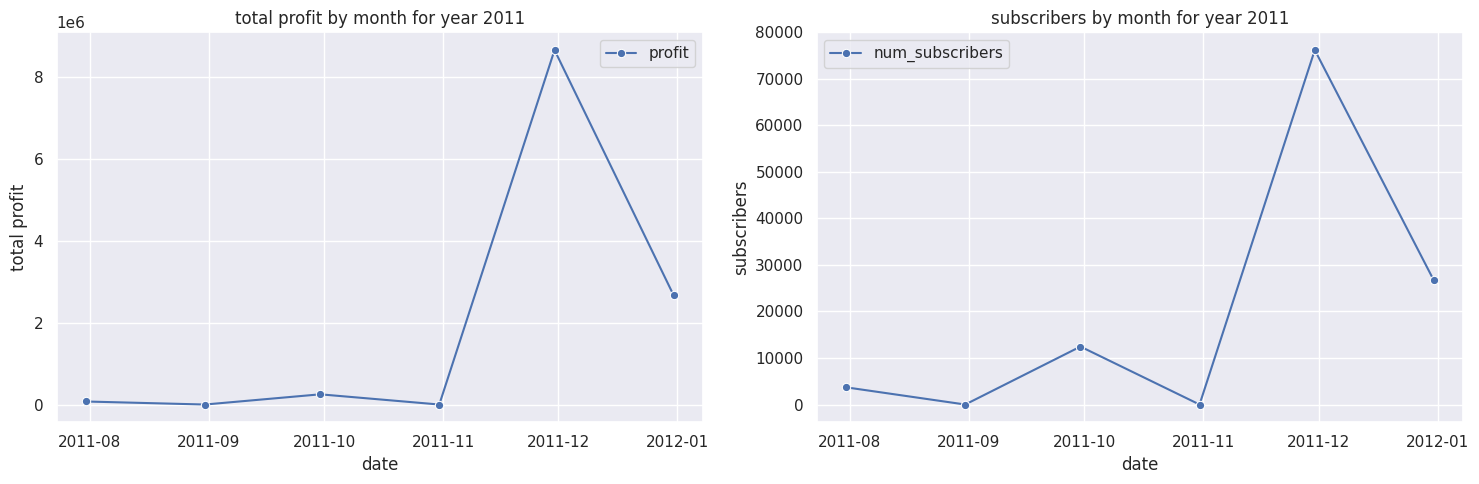

In [117]:
for y in df_date.index.year.unique():
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.lineplot(data= df_date[df_date.index.year == y].resample('ME').agg({'profit': 'sum'}), markers= 'o')
    plt.title(f'total profit by month for year {y}')
    plt.ylabel('total profit')
    plt.xlabel('date')

    plt.subplot(1, 2, 2)
    sns.lineplot(data= df_date[df_date.index.year == y].resample('ME').agg({'num_subscribers': 'sum'}), markers= 'o')
    plt.title(f'subscribers by month for year {y}')
    plt.ylabel('subscribers')
    plt.xlabel('date')

    plt.tight_layout()
    plt.show()